## Observations and Insights 

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results,on=('Mouse ID'))

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
merged_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
# no duplicate 

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_mean=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df=pd.DataFrame({"Mean":drug_mean,"Median":drug_median,"Variance":drug_variance,"Standard Deviation":drug_std,
                         "SEM":drug_sem})

summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
# set dictionary 'd' to hold the aggregations 
d={'Tumor Volume (mm3)' : ['mean','median','var','std','sem']}

merged_df.groupby(['Drug Regimen']).agg(d).reset_index()

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

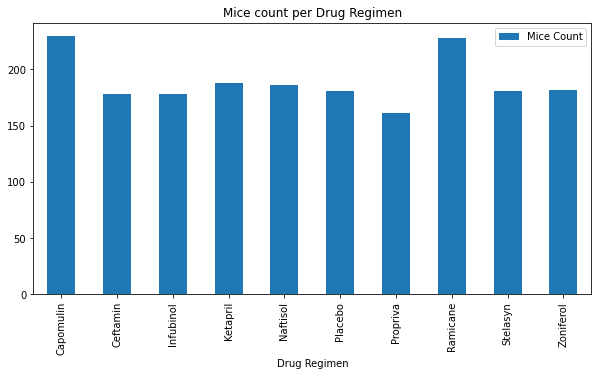

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Filter the dataframe to mouse ID and treatment and rename mouse ID to Mice count
treatment_df=pd.DataFrame(merged_df.groupby(["Drug Regimen"]).count()).reset_index()
data_for_plot=treatment_df[["Drug Regimen","Mouse ID"]]
data_for_plot=data_for_plot.rename(columns={"Mouse ID":"Mice Count"})

# Set the index to Drug Regimen so they will be used as labels
data_for_plot=data_for_plot.set_index("Drug Regimen")

# use DataFrame.plot to create chart
data_for_plot.plot(kind="bar", figsize=(10,5))

# set a title for the chart
plt.title("Mice count per Drug Regimen")

plt.show()
plt.tight_layout




<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

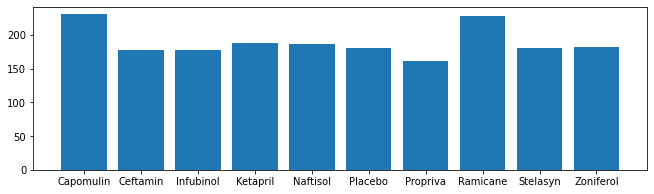

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# make a list of drug regimens for x axis
drug_regimens=summary_df.index.tolist()
drug_regimens

# make a list of mice count
Mice_count=merged_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
Mice_count

# Plot bar chart using the above list
x_axis = np.arange(len(Mice_count))
x_axis = drug_regimens
plt.figure(figsize=(11,3))
plt.bar(x_axis, Mice_count, align="center")
plt.tight_layout


In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df=pd.DataFrame(merged_df.groupby(["Sex"]).count()).reset_index()
gender_df


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


<AxesSubplot:ylabel='Timepoint'>

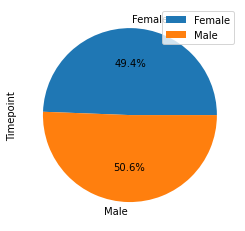

In [87]:
# Filter the column down to just those 2 to chart
gender_df=gender_df[["Sex","Timepoint"]]
gender_df

# Plot chart
gender_df.plot(kind='pie',y='Timepoint',autopct='%1.1f%%',labels=gender_df['Sex'])


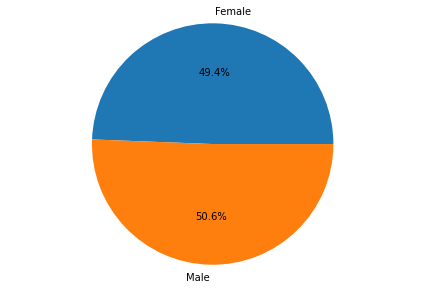

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Make lists for the pie chart
genders=["Female","Male"]
Timecounts=[935,958]

fig1,ax1=plt.subplots()
ax1.pie(Timecounts,labels=genders,autopct='%1.1f%%')

ax1.axis('equal')
plt.tight_layout()
plt.show()




## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merged_df.head(10)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# work out result for Capomulin
final_tumor_volumn=merged_df.loc[merged_df["Timepoint"]==45]
final_tumor_volumn.head()

# result Capomulin
sorted_four_C=final_tumor_volumn[final_tumor_volumn['Drug Regimen'].isin(['Capomulin'])]
sorted_four_C



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


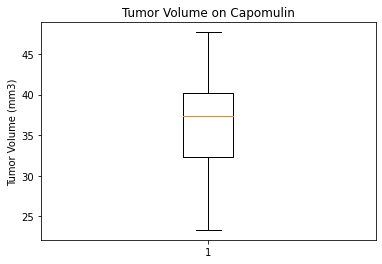

In [141]:
Tumor_list_C=sorted_four_C["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volume on Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_list_C)
plt.show()

In [155]:
# IQR and possible outliers for treatment Capomulin

# Quartile
quartiles=Tumor_list_C.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq=lowerq
lower_bound=lowerq - (1.5 * iqr)
upper_bound=upperq + (1.5 * iqr)

print(f"The Lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"Values below {lower_bound}  is possibly outliers.")
print(f"Values above {upper_bound}  is possibly outliers.")

The Lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 32.37735684
The IQR is: 32.37735684
Values below -16.188678419999995  is possibly outliers.
Values above 80.94339209999998  is possibly outliers.


In [135]:
# Work out result for Ramicane
sorted_four_R=final_tumor_volumn[final_tumor_volumn['Drug Regimen'].isin(['Ramicane'])]
sorted_four_R

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
184,i177,Ramicane,Male,10,18,45,33.562402,3


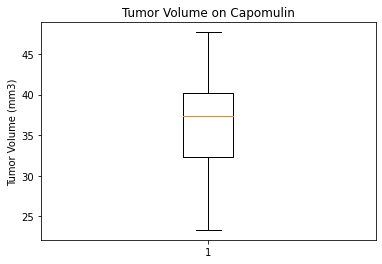

In [149]:
# plot for Ramicane
Tumor_list_R=sorted_four_C["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volume on Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_list_C)
plt.show()

In [156]:
# Quartile
quartiles=Tumor_list_R.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq=lowerq
lower_bound=lowerq - (1.5 * iqr)
upper_bound=upperq + (1.5 * iqr)

print(f"The Lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"Values below {lower_bound}  is possibly outliers.")
print(f"Values above {upper_bound}  is possibly outliers.")

The Lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 32.37735684
The IQR is: 32.37735684
Values below -16.188678419999995  is possibly outliers.
Values above 80.94339209999998  is possibly outliers.


In [157]:
# Quartile
quartiles=Tumor_list_R.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq=lowerq
lower_bound=lowerq - (1.5 * iqr)
upper_bound=upperq + (1.5 * iqr)

print(f"The Lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"Values below {lower_bound}  is possibly outliers.")
print(f"Values above {upper_bound}  is possibly outliers.")

The Lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 32.37735684
The IQR is: 32.37735684
Values below -16.188678419999995  is possibly outliers.
Values above 80.94339209999998  is possibly outliers.


In [136]:
# Work out result for Infubinol
sorted_four_I=final_tumor_volumn[final_tumor_volumn['Drug Regimen'].isin(['Infubinol'])]
sorted_four_I

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


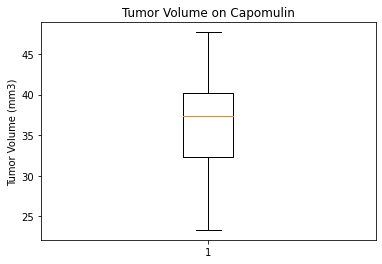

In [152]:
# plot for Infubinol
Tumor_list_I=sorted_four_C["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volume on Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_list_C)
plt.show()

In [158]:
# Quartile
quartiles=Tumor_list_I.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq=lowerq
lower_bound=lowerq - (1.5 * iqr)
upper_bound=upperq + (1.5 * iqr)

print(f"The Lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"Values below {lower_bound}  is possibly outliers.")
print(f"Values above {upper_bound}  is possibly outliers.")

The Lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 32.37735684
The IQR is: 32.37735684
Values below -16.188678419999995  is possibly outliers.
Values above 80.94339209999998  is possibly outliers.


In [137]:
# Work out result for Ceftamin
sorted_four_CT=final_tumor_volumn[final_tumor_volumn['Drug Regimen'].isin(['Ceftamin'])]
sorted_four_CT

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


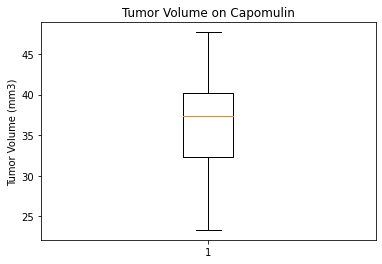

In [153]:
# plot for Ceftamin
Tumor_list_CT=sorted_four_C["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volume on Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_list_C)
plt.show()

In [159]:
# Quartile
quartiles=Tumor_list_CT.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq=lowerq
lower_bound=lowerq - (1.5 * iqr)
upper_bound=upperq + (1.5 * iqr)

print(f"The Lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"Values below {lower_bound}  is possibly outliers.")
print(f"Values above {upper_bound}  is possibly outliers.")

The Lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 32.37735684
The IQR is: 32.37735684
Values below -16.188678419999995  is possibly outliers.
Values above 80.94339209999998  is possibly outliers.


In [173]:
# multiple plots in same figure


## Line and Scatter Plots

In [175]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse ID u364 was selected from the list above (Capomulin)
capomulin=merged_df.loc[merged_df["Drug Regimen"]=="Capomulin"]

selected_mouse=capomulin.loc[capomulin["Mouse ID"]=="u364"]
selected_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


<AxesSubplot:xlabel='Timepoint'>

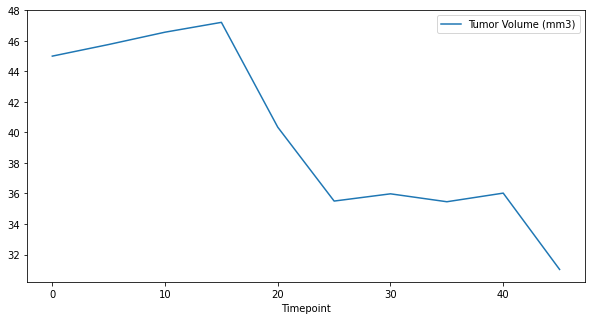

In [178]:
# Only Timepoint and Tumor Volume used for plot
selected_mouse=selected_mouse.loc[:,["Timepoint","Tumor Volume (mm3)"]]

selected_mouse=selected_mouse.reset_index(drop=True)

selected_mouse.set_index('Timepoint').plot(figsize=(10,5))

In [199]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# retrieve the data for the plot
weight_vs_tumor=capomulin.loc[:,["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#calculate the average Tumor volume
ave_tumor=pd.DataFrame(weight_vs_tumor.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean())


# rename the Tumor volume to Average Tumor size for the plot
ave_tumor=ave_tumor.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})

ave_tumor.head()


,,Average Tumor Volume
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [202]:
# # set Mouse ID as index
ave_tumor=ave_tumor.set_index("Mouse ID")

# plot the data
ave_tumor.plot(kind="scatter",x="Weight (g)",y="Average Tumor Volume",grid=True,figsize=(5,5),title="Weight VS Average Tumor Volume")

Plt.show()

KeyError: "None of ['Mouse ID'] are in the columns"

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
